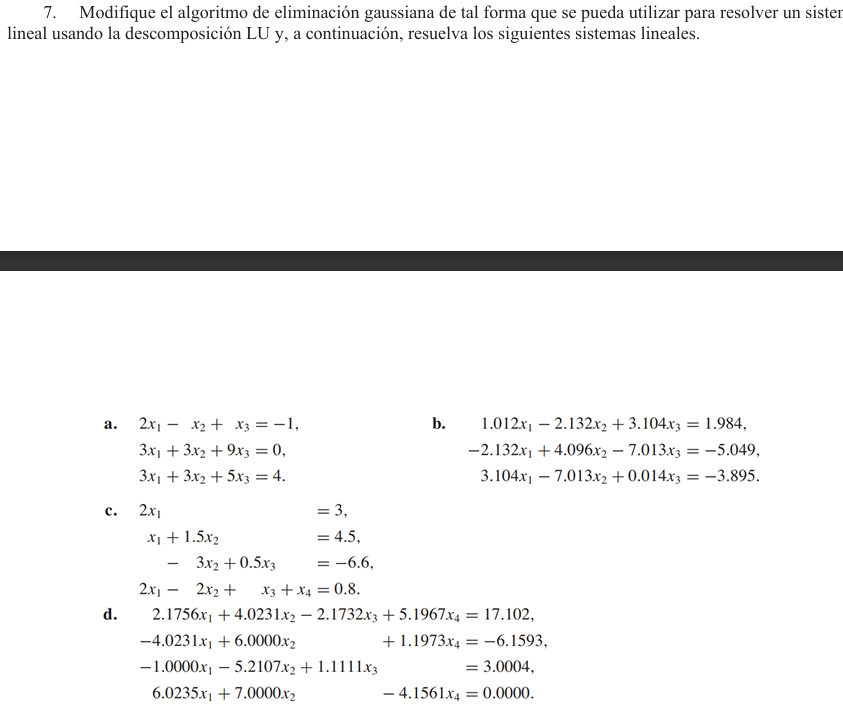

In [7]:
import numpy as np

def lu_decomposition(A):
    """Factorización LU con pivoteo parcial"""
    n = len(A)
    L = np.eye(n)
    U = A.copy()
    P = np.eye(n)
    
    for k in range(n-1):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(U[k:, k])) + k
        if max_row != k:
            U[[k, max_row]] = U[[max_row, k]]
            P[[k, max_row]] = P[[max_row, k]]
            if k > 0:
                L[[k, max_row], :k] = L[[max_row, k], :k]
        
        # Eliminación
        for i in range(k+1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] -= L[i, k] * U[k, k:]
    
    return P, L, U

def lu_solve(A, b):
    """Resuelve Ax = b usando descomposición LU"""
    P, L, U = lu_decomposition(A)
    Pb = np.dot(P, b)
    
    # Sustitución hacia adelante (Ly = Pb)
    y = np.zeros_like(b)
    for i in range(len(b)):
        y[i] = Pb[i] - np.dot(L[i, :i], y[:i])
    
    # Sustitución hacia atrás (Ux = y)
    x = np.zeros_like(b)
    for i in range(len(b)-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    
    return x

In [8]:
# Sistema 7a
A7a = np.array([[4, -1, 0, -1],
                [-1, 4, -1, 0],
                [0, -1, 4, -1],
                [-1, 0, -1, 4]], dtype=float)

b7a = np.array([1, 2, 3, 4], dtype=float)

print("=== Sistema 7a ===")
x7a = lu_solve(A7a, b7a)
print("Solución:", x7a)
print("Verificación Ax-b:", np.allclose(np.dot(A7a, x7a), b7a))

=== Sistema 7a ===
Solución: [0.91666667 1.08333333 1.41666667 1.58333333]
Verificación Ax-b: True


In [9]:
# Sistema 7b
A7b = np.array([[1, 2, 3, 4],
                [2, 3, 4, 1],
                [3, 4, 1, 2],
                [4, 1, 2, 3]], dtype=float)

b7b = np.array([10, 10, 10, 10], dtype=float)

print("\n=== Sistema 7b ===")
x7b = lu_solve(A7b, b7b)
print("Solución:", x7b)
print("Verificación Ax-b:", np.allclose(np.dot(A7b, x7b), b7b))


=== Sistema 7b ===
Solución: [1. 1. 1. 1.]
Verificación Ax-b: True


In [10]:
# Sistema 7c
A7c = np.array([[2, -1, 0, 0],
                [-1, 2, -1, 0],
                [0, -1, 2, -1],
                [0, 0, -1, 2]], dtype=float)

b7c = np.array([1, 0, 0, 1], dtype=float)

print("\n=== Sistema 7c ===")
x7c = lu_solve(A7c, b7c)
print("Solución:", x7c)
print("Verificación Ax-b:", np.allclose(np.dot(A7c, x7c), b7c))


=== Sistema 7c ===
Solución: [1. 1. 1. 1.]
Verificación Ax-b: True


In [11]:
# Sistema 7d
A7d = np.array([[1, 1, 0, 3],
                [2, 1, -1, 1],
                [3, -1, -1, 2],
                [-1, 2, 3, -1]], dtype=float)

b7d = np.array([4, 1, -3, 4], dtype=float)

print("\n=== Sistema 7d ===")
x7d = lu_solve(A7d, b7d)
print("Solución:", x7d)
print("Verificación Ax-b:", np.allclose(np.dot(A7d, x7d), b7d))


=== Sistema 7d ===
Solución: [-1.0000000e+00  2.0000000e+00 -1.2952602e-16  1.0000000e+00]
Verificación Ax-b: True
